# Character Classification
This notebook contains all steps of OCR

In [7]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

sys.path.append('../src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

### Global Variables

In [8]:
# Settings
IMG = 'text5'    # 1, 2, 3
LANG = 'en'      # cz, en
MODEL_LOC = '../models/char-clas/' + LANG + '/CharClassifier'

## Load Trained Model

In [9]:
CHARACTER_MODEL = Model(MODEL_LOC)

INFO:tensorflow:Restoring parameters from ../models/char-clas/en/CharClassifier


## Load image

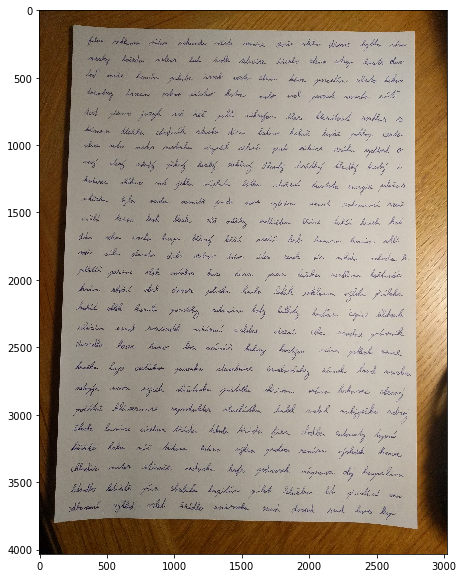

In [10]:
image = cv2.cvtColor(cv2.imread("../data/pages/%s.jpg" % IMG), cv2.COLOR_BGR2RGB)
implt(image)

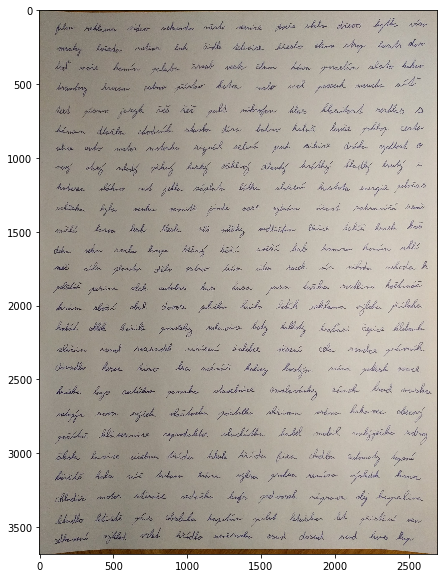

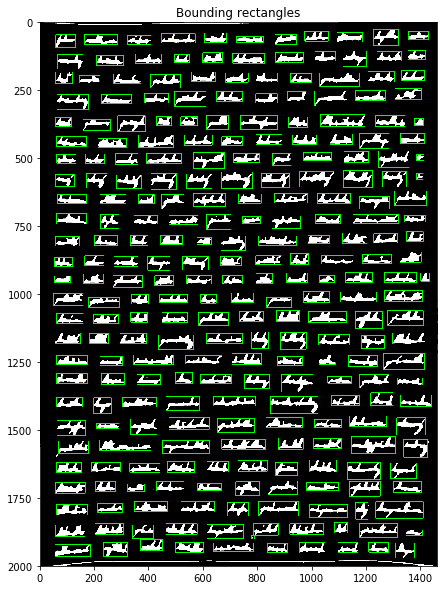

In [11]:
# Crop image and get bounding boxes
crop = page.detection(image)
implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

# Simple UI using widgets

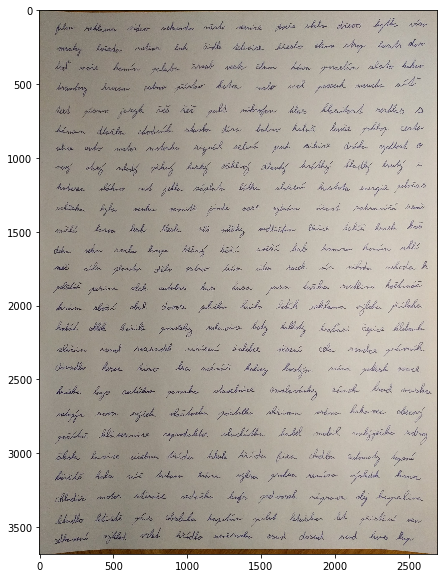

fieoou reklama ndeo sekeonda mestv veznice dvere sklo drew kytka vaza
msaky hvezda meteor luk zidle televize hreslce okno strop eustr olovo
lod more komin paluba sroub vesto clun kaoa pmrcelan slato kakao
brambory krocan ostmv pristav kotva molo mol pavoock moncha sit
teet pisavo jisyk res rec pult rnikrofon hlas hlasitost raklas s
kamen dluzba dodnik stavba dira bahno kaluz louze poklop cesta
ulice auto motor motvrka zignal zeleua pruh silnice draha iychlost o
novy stary mhady pekny hezky osklivy dloudy kratky kladky hruty i
koberec vlakno nit jehla zaplata latka slozeni hustota energie polocas
schuzka byla vcnku vevnitr jinde zase mhran ucast zahranici zeme
umela bawa lesk blezk nuz neezky vidlicka lzice talir hriek kos
deka wu soda larmpa bezny bezi svezi krb bnanano komin uhli
mec sila planetrr delpp oestrw trawa utes racek vir nahoda whoda k
polstar perina vlak aeetobus bus husa pusa tuzka rostlina hveanac
kram zbozi obal dovoz policka kniha letak reklama vyloha priloha
kabat oble

In [12]:
def recognise(img):
    """ Recognising word and printing it """
    # Pre-processing the word
    img = word_normalization(
        img,
        60,
        border=False,
        tilt=True,
        hyst_norm=True)

    # Separate letters
    img = cv2.copyMakeBorder(
        img,
        0, 0, 30, 30,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0])
    gaps = characters.segment(img, RNN=True)

    chars = []
    for i in range(len(gaps)-1):
        char = img[:, gaps[i]:gaps[i+1]]
        char, dim = letter_normalization(char, is_thresh=True, dim=True)
        # TODO Test different values
        if dim[0] > 4 and dim[1] > 4:
            chars.append(char.flatten())

    chars = np.array(chars)
    word = ''        
    if len(chars) != 0:
        pred = CHARACTER_MODEL.run(chars)                
        for c in pred:
            word += idx2char(c)

    return word

implt(crop)
for line in lines:
    print(" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))